'''
MONTEREY BAY BUOY DATA

Small coastal towns this winter in California like Santa Cruz were heavily affected by large swells 
combined with record-breaking precipitaion. 2/3 of the piers in Santa Cruz county were destroyed this last 
winter. Because of the revenue coastal areas generate, it's important for city planners and 
government agencies to understand the implications that may come from extreme ocean weather events 
and to predict the frequency of these events.

The question is: Could we have anticipated this?

Climate change predicts an increase in the frequency of extreme events. Using historical buoy data nearshore 
in Central California are we...
1. Observing an increase in wave height?
2. Observing an increase in the number of days that swell exceeds 15ft (high surf advisory)?
3. What direction are these damaging swells coming from, what other properties are associated with them? Wind?
4. What's going on with SST at this location? Is it matching with the global increase average air temperature?
5. Predicting frequency of swell events above 15ft into future?
6. Predicting water temperature into the future?
7. Cartopy map of the buoy location using lat and lon. 
8. Change in mean wave direction?

Are we seeing a change in sea surface temperature that matches the increase in air temperature?

7.cartopy map of the buoy location using the lat,lons. !

is mean wave direction changing?? aka storm track? swell track??

'''

In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely.geometry import Point, LineString
import geopandas as gpd
from matplotlib.ticker import AutoMinorLocator

In [ ]:
# 46092 = Monterey Bay # 2005 - 2023

# Station 46042 (LLNR 297) - MONTEREY - 27NM WNW of Monterey, CA
# Owned and maintained by National Data Buoy Center
## time_period = range(1987, 2022)
# 36.785 N 122.396 W (36°47'5" N 122°23'46" W)
#99.0 = error for wvht and 999.0 = error for wtmp
# filter out rows with those


In [2]:
url_template = 'https://www.ndbc.noaa.gov/view_text_file.php?filename=46042h{year}.txt.gz&dir=data/historical/stdmet/'
    
# create an empty list to store the data frames
dfs = []

# loop through the years
for year in range(1988, 2023):

    # construct the file path
    url = url_template.format(year=year)
    
    # parse the data and create a data frame
    df = pd.read_csv(url, delim_whitespace=True, skiprows=1, header=None, names=['year', 'month', 'day', 'hour', 'minute', 'wdir', 'wspd', 'gst', 'wvht', 'dpd', 'apd', 'mwd', 'pres', 'atmp', 'wtmp', 'dewp', 'vis', 'ptdy', 'tide'])
    
    # add the data frame to the list
    dfs.append(df)

# concatenate all the data frames into a single data frame
buoy_46042 = pd.concat(dfs, ignore_index=True)

# print the resulting data frame
buoy_46042

/Users/dylan/opt/anaconda3/envs/geo2023spring/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,month,day,hour,minute,wdir,wspd,gst,wvht,dpd,apd,mwd,pres,atmp,wtmp,dewp,vis,ptdy,tide
0,88,1,1,1,10,3.0,4.0,1.7,10.0,7.4,999,1025.3,9.5,11.8,999.0,99.0,NaN,NaN,NaN
1,88,1,1,2,360,3.0,4.0,1.5,9.1,7.2,999,1025.5,9.4,11.8,999.0,99.0,NaN,NaN,NaN
2,88,1,1,3,50,6.0,7.0,1.6,10.0,7.0,999,1025.5,9.5,11.8,999.0,99.0,NaN,NaN,NaN
3,88,1,1,4,50,7.0,8.0,1.5,16.7,6.8,999,1025.3,9.3,11.7,999.0,99.0,NaN,NaN,NaN
4,88,1,1,5,60,8.0,10.0,1.6,16.7,5.9,999,1025.1,9.3,11.7,999.0,99.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430195,2022,12,31,23,10,297,10.4,15.2,99.0,99.0,99.0,999,1001.6,12.2,999.0,999.0,99.0,99.0,NaN
430196,2022,12,31,23,20,296,11.9,15.5,99.0,99.0,99.0,999,1001.5,12.2,999.0,999.0,99.0,99.0,NaN
430197,2022,12,31,23,30,302,13.0,17.9,99.0,99.0,99.0,999,1001.3,12.3,999.0,999.0,99.0,99.0,NaN
430198,2022,12,31,23,40,307,13.5,18.4,3.86,12.9,7.17,272,1001.2,12.3,999.0,999.0,99.0,99.0,NaN


In [3]:
print(buoy_46042.info())
# print(df.index.name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430200 entries, 0 to 430199
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    430200 non-null  object 
 1   month   430200 non-null  object 
 2   day     430200 non-null  object 
 3   hour    430200 non-null  object 
 4   minute  430200 non-null  object 
 5   wdir    430200 non-null  object 
 6   wspd    430200 non-null  object 
 7   gst     430200 non-null  object 
 8   wvht    430200 non-null  object 
 9   dpd     430200 non-null  object 
 10  apd     430200 non-null  object 
 11  mwd     430200 non-null  object 
 12  pres    430200 non-null  object 
 13  atmp    430200 non-null  object 
 14  wtmp    430200 non-null  object 
 15  dewp    430200 non-null  object 
 16  vis     330693 non-null  object 
 17  ptdy    292023 non-null  object 
 18  tide    0 non-null       float64
dtypes: float64(1), object(18)
memory usage: 62.4+ MB
None


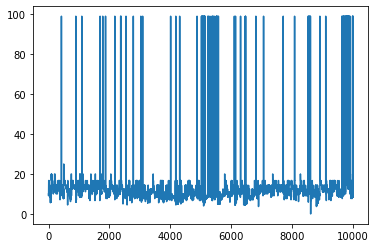

In [4]:
plt.plot(buoy_46042['wvht'][0:10000])

In [ ]:
# drop the rows that contain wtmp = 999.0
buoy_46042_wtmp_anal = buoy_46042.drop(buoy_46042[buoy_46042['wtmp'] == 999.0].index)
print(buoy_46042_wtmp_anal)

In [5]:
# drop the rows that contain wtmp == 99.0
buoy_46042_wvht_anal = buoy_46042.drop(buoy_46042[buoy_46042['wvht'] == 99.0].index)
print(buoy_46042_wvht_anal)

        year month day hour minute wdir  wspd   gst  wvht    dpd   apd  \
0         88     1   1    1     10  3.0   4.0   1.7  10.0    7.4   999   
1         88     1   1    2    360  3.0   4.0   1.5   9.1    7.2   999   
2         88     1   1    3     50  6.0   7.0   1.6  10.0    7.0   999   
3         88     1   1    4     50  7.0   8.0   1.5  16.7    6.8   999   
4         88     1   1    5     60  8.0  10.0   1.6  16.7    5.9   999   
...      ...   ...  ..  ...    ...  ...   ...   ...   ...    ...   ...   
430174  2022    12  31   19     40  172  10.9  15.1  2.99  13.79  6.54   
430180  2022    12  31   20     40  175  12.8  16.2  3.17  12.12  6.51   
430186  2022    12  31   21     40  181  12.4  15.2  3.38  14.81  6.57   
430192  2022    12  31   22     40  242  10.8  17.3  3.32  10.81  6.34   
430198  2022    12  31   23     40  307  13.5  18.4  3.86   12.9  7.17   

           mwd    pres  atmp   wtmp   dewp   vis  ptdy  tide  
0       1025.3     9.5  11.8  999.0   99.0   NaN

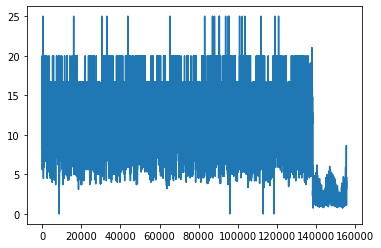

In [6]:
plt.plot(buoy_46042_wvht_anal['wvht'][0:152610]) # and then theres a string #yr row

In [7]:
buoy_46042_wvht_anal['wvht'][0:152610].max()

25.0

In [8]:
print(buoy_46042_wvht_anal[152610:152610+10]) # theres a row in here that has a header

        year month day hour minute  wdir wspd  gst  wvht    dpd    apd   mwd  \
155559  2006    12  31   22      0   344  3.2  4.2  3.18  14.81  10.24   289   
155560  2006    12  31   23      0   330  4.2  5.4  3.49  13.79  10.78   283   
155561   #yr    mo  dy   hr     mn  degT  m/s  m/s     m    sec    sec  degT   
155562  2007    01  01   00     00   335  5.9  7.6  3.04  13.79  10.21   287   
155563  2007    01  01   01     00   322  6.2  9.0  3.29  14.81  10.39   287   
155564  2007    01  01   02     00   346  6.3  8.2  3.00  13.79   9.99   296   
155565  2007    01  01   03     00   346  6.2  7.6  2.98  13.79   9.71   285   
155566  2007    01  01   04     00   351  6.9  8.7  2.98  12.90   9.44   293   
155567  2007    01  01   05     00   333  6.6  8.0  3.02  12.90   9.24   297   
155568  2007    01  01   06     00   338  6.4  8.0  2.88  12.90   9.31   297   

          pres  atmp  wtmp   dewp   vis   ptdy  tide  
155559  1025.1  11.1  13.0  999.0  99.0   99.0   NaN  
155560  1

In [9]:
len(buoy_46042_wvht_anal[buoy_46042_wvht_anal['year'] == '#yr'].index)

16

In [11]:
buoy_46042_wvht_anal_nostrings = buoy_46042_wvht_anal.drop(buoy_46042_wvht_anal[buoy_46042_wvht_anal['year'] == '#yr'].index)
print(buoy_46042_wvht_anal_nostrings)
print(buoy_46042_wvht_anal_nostrings[152610:152610+10])

        year month day hour minute wdir  wspd   gst  wvht    dpd   apd  \
0         88     1   1    1     10  3.0   4.0   1.7  10.0    7.4   999   
1         88     1   1    2    360  3.0   4.0   1.5   9.1    7.2   999   
2         88     1   1    3     50  6.0   7.0   1.6  10.0    7.0   999   
3         88     1   1    4     50  7.0   8.0   1.5  16.7    6.8   999   
4         88     1   1    5     60  8.0  10.0   1.6  16.7    5.9   999   
...      ...   ...  ..  ...    ...  ...   ...   ...   ...    ...   ...   
430174  2022    12  31   19     40  172  10.9  15.1  2.99  13.79  6.54   
430180  2022    12  31   20     40  175  12.8  16.2  3.17  12.12  6.51   
430186  2022    12  31   21     40  181  12.4  15.2  3.38  14.81  6.57   
430192  2022    12  31   22     40  242  10.8  17.3  3.32  10.81  6.34   
430198  2022    12  31   23     40  307  13.5  18.4  3.86   12.9  7.17   

           mwd    pres  atmp   wtmp   dewp   vis  ptdy  tide  
0       1025.3     9.5  11.8  999.0   99.0   NaN

        year month day hour minute wdir wspd  gst  wvht    dpd    apd  mwd  \
155559  2006    12  31   22      0  344  3.2  4.2  3.18  14.81  10.24  289   
155560  2006    12  31   23      0  330  4.2  5.4  3.49  13.79  10.78  283   
155562  2007    01  01   00     00  335  5.9  7.6  3.04  13.79  10.21  287   
155563  2007    01  01   01     00  322  6.2  9.0  3.29  14.81  10.39  287   
155564  2007    01  01   02     00  346  6.3  8.2  3.00  13.79   9.99  296   
155565  2007    01  01   03     00  346  6.2  7.6  2.98  13.79   9.71  285   
155566  2007    01  01   04     00  351  6.9  8.7  2.98  12.90   9.44  293   
155567  2007    01  01   05     00  333  6.6  8.0  3.02  12.90   9.24  297   
155568  2007    01  01   06     00  338  6.4  8.0  2.88  12.90   9.31  297   
155569  2007    01  01   07     00  342  6.7  8.2  3.17  12.90   9.75  304   

          pres  atmp  wtmp   dewp   vis   ptdy  tide  
155559  1025.1  11.1  13.0  999.0  99.0   99.0   NaN  
155560  1025.1  11.4  13.0  999

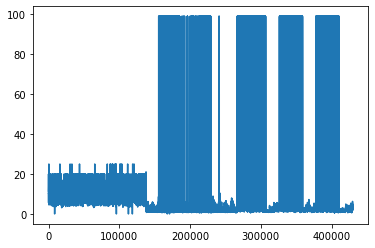

In [13]:
plt.plot(buoy_46042_wvht_anal_nostrings['wvht'][:])

buoy_46042_wvht_anal_nostrings_no99 = buoy_46042_wvht_anal_nostrings.drop(buoy_46042_wvht_anal_nostrings[buoy_46042_wvht_anal_nostrings['wvht']==99.0].index)
print(buoy_46042_wvht_anal_nostrings_no99[152610:152610+10]) # #yr is gone!

In [26]:
print(buoy_46042_wvht_anal_nostrings_no99.wvht.index)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            430144, 430150, 430156, 430162, 430168, 430174, 430180, 430186,
            430192, 430198],
           dtype='int64', length=379413)


In [82]:
# plt.plot(buoy_46042_wvht_anal_nostrings_no99['year'][92000:94500])
# plt.ylim(80,2020)
print((buoy_46042_wvht_anal_nostrings_no99['year'] == 1997))


0          True
1          True
2          True
3          True
4          True
          ...  
430174    False
430180    False
430186    False
430192    False
430198    False
Name: year, Length: 379413, dtype: bool


In [87]:
buoy_46042_wvht_anal_nostrings_no99.to_csv('data1.txt', sep='\t') # now i want to have a datetime as index

In [136]:
# assume df is your DataFrame and the year column is called 'year'

# convert YY format to YYYY format
df_new = buoy_46042_wvht_anal_nostrings_no99.copy()
# print(df_new)
# print(df_new.year[86879:86888])
# print(df_new.year[:86887])
print(df_new.iloc[86880])

# df_new['year'] = df_new['year'][0:86882].apply(lambda x: int('19' + str(x)))

# buoy_46042_wvht_anal_nostrings_no99['year'] = buoy_46042_wvht_anal_nostrings_no99['year'].apply(lambda x: int('19' + str(x)) if int(x) > 50 else int('20' + str(x)))

# continue processing the DataFrame
# print(df_new['year'][86883-10:86883+10])


year          98
month         12
day           31
hour          23
minute       326
wdir         9.5
wspd        11.6
gst         2.32
wvht       14.29
dpd          6.4
apd          282
mwd       1019.9
pres        11.0
atmp        11.0
wtmp       999.0
dewp        99.0
vis          NaN
ptdy         NaN
tide         NaN
Name: 88564, dtype: object


In [ ]:
import pandas as pd

# combine year, month, day, hour, and minute columns into a single datetime column
buoy_46042_wvht_anal_nostrings_no99['time'] = pd.to_datetime(buoy_46042_wvht_anal_nostrings_no99[['year', 'month', 'day', 'hour', 'minute']])

# drop the original year, month, day, hour, and minute columns
buoy_46042_wvht_anal_nostrings_no99.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

# set the 'time' column as the index
buoy_46042_wvht_anal_nostrings_no99.set_index('time', inplace=True)

# error because 88 is YY not YYYY